In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch
import xarray as xr
import pandas as pd
import os
import datetime
import seaborn as sns

import cartopy
import cartopy.crs as ccrs
from pyresample import load_area, geometry

import quantnn

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = os.path.join(f.readline().rstrip("\n"))
f.close() 

In [5]:
combined = xr.open_dataset(os.path.join(path_to_dataset,'combined.nc'))

In [8]:
combined

<xarray.Dataset>
Dimensions:                  (location: 609, time: 738)
Coordinates:
  * location                 (location) int64 0 1 2 3 4 ... 604 605 606 607 608
  * time                     (time) datetime64[ns] 2020-12-01T01:00:00 ... 20...
Data variables:
    xception_posterior_mean  (time, location) float32 ...
    xception_Q0.95           (time, location) float32 ...
    xception_Q0.99           (time, location) float32 ...
    mlp_posterior_mean       (time, location) float32 ...
    mlp_Q0.95                (time, location) float32 ...
    mlp_Q0.99                (time, location) float32 ...
    HE_precip                (time, location) float64 ...
    gauge_precip             (time, location) float64 ...

391


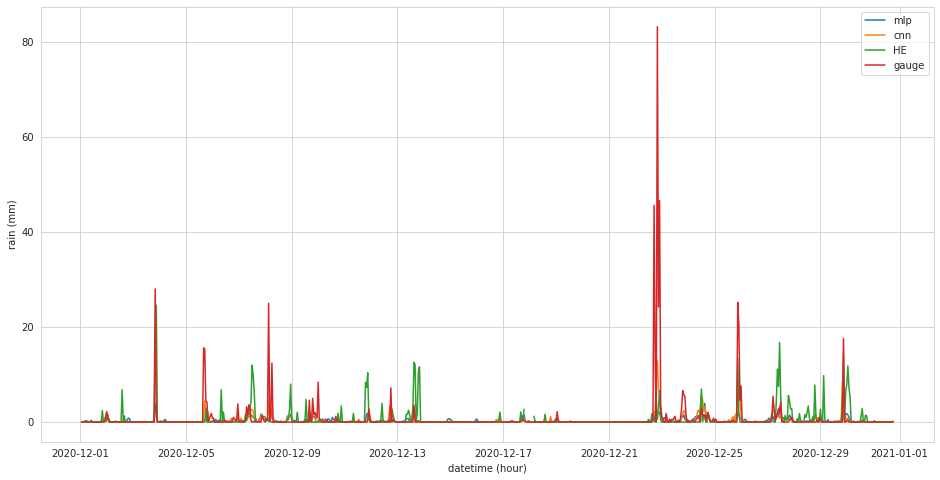

In [7]:
sns.set_style('whitegrid')
ind = 391 
print(ind)

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(combined.time, combined.mlp_posterior_mean[:, ind], label='mlp')
plt.plot(combined.time, combined.xception_posterior_mean[:, ind], label='cnn')
plt.plot(combined.time, combined.HE_precip[:, ind], label='HE')
plt.plot(combined.time, combined.gauge_precip[:, ind], label='gauge')

ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()

In [21]:
np.nanmean(combined.gauge_precip-combined.HE_precip)

-0.10395083635324988

In [23]:
np.nanmean(combined.gauge_precip-combined.xception_posterior_mean)

-0.004699792821834452

In [24]:
np.nanmean(combined.gauge_precip-combined.mlp_posterior_mean)

0.020730019446901584

In [33]:
np.nanmean(np.square(np.subtract(combined.gauge_precip.values, combined.HE_precip.values)))

3.940874754925588

In [36]:
np.nanmean(np.square(np.subtract(combined.gauge_precip.values, combined.xception_posterior_mean.values)))

1.7017950619618278

In [35]:
np.nanmean(np.square(np.subtract(combined.gauge_precip.values, combined.mlp_posterior_mean.values)))

2.04128937113025